 **➡️Install Required Libraries**

In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn

 **➡️Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

 **➡️Load the Data**

In [51]:
# Load dataset
file_path = "/content/Accumulative_distribution.csv"
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())

   ID           Type  Movie_number  Fly_number  Other_number  Difference_x  \
0   1  Dmelanogaster             1           1             0     -9.713147   
1   2  Dmelanogaster             1           2             0    -23.854249   
2   3  Dmelanogaster             1           3             0    -59.388140   
3   4  Dmelanogaster             1           4             0    -62.456371   
4   5  Dmelanogaster             1           5             0     -9.644838   

   Difference_y   Distance  
0      4.991989  10.920860  
1    -16.237289  28.856104  
2     63.130531  86.674189  
3    -37.194611  72.692760  
4      9.009750  13.198428  


 **➡️Select numerical columns for outlier detection**

In [52]:
num_cols = ['Difference_x', 'Difference_y', 'Distance']

**➡️Standardizing data (for some methods)**

In [53]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[num_cols])

In [13]:
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

# **🌸METHOD 1: Z-SCORE (Distance-Based)**

In [54]:
z_scores = np.abs((data[num_cols] - data[num_cols].mean()) / data[num_cols].std())
threshold = 2.5  # Common threshold
outliers_z = (z_scores > threshold).any(axis=1)
data['Outlier_Zscore'] = outliers_z

Text(0.5, 1.0, 'Z-score Outlier Detection')

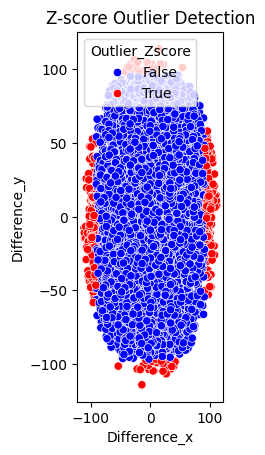

In [55]:
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['Difference_x'], y=data['Difference_y'], hue=data['Outlier_Zscore'], palette={True: 'red', False: 'blue'})
plt.title("Z-score Outlier Detection")

# **🌸METHOD 2: IQR (Interquartile Range)**

In [56]:
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((data[num_cols] < (Q1 - 2 * IQR)) | (data[num_cols] > (Q3 + 2 * IQR))).any(axis=1)
data['Outlier_IQR'] = outliers_iqr

Text(0.5, 1.0, 'IQR Outlier Detection')

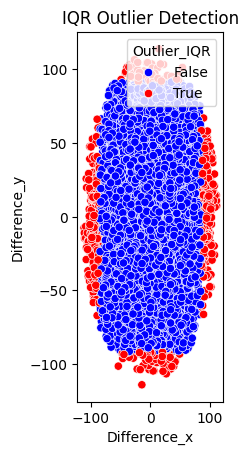

In [57]:
plt.subplot(1, 3, 2)
sns.scatterplot(x=data['Difference_x'], y=data['Difference_y'], hue=data['Outlier_IQR'], palette={True: 'red', False: 'blue'})
plt.title("IQR Outlier Detection")

# **🌸METHOD 3: DBSCAN (Density-Based)**

In [59]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
df_extended['Outlier_DBSCAN'] = dbscan.fit_predict(scaled_data)

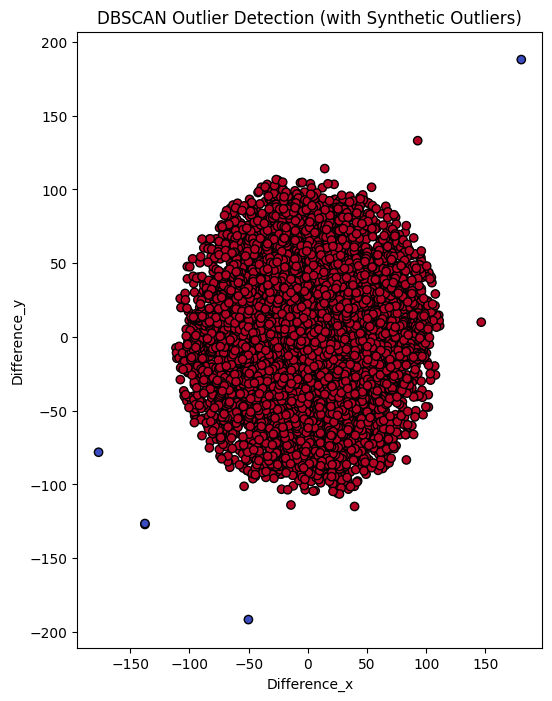

In [60]:
plt.figure(figsize=(6, 8))
plt.scatter(df_extended['Difference_x'], df_extended['Difference_y'],
            c=df_extended['Outlier_DBSCAN'], cmap='coolwarm', edgecolors='k')
plt.title("DBSCAN Outlier Detection (with Synthetic Outliers)")
plt.xlabel("Difference_x")
plt.ylabel("Difference_y")
plt.show()